In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpl_patches
import scipy.stats as stats
from scipy.stats import mannwhitneyu

In [3]:
df = pd.read_table('Fig3B.csv', sep = "\t")
df.head()

,Population,Sample,B,Ca,Cd,Co,Cu,Fe,K,Li,...,Mn,Mo,Na,Ni,P,Pb,Rb,S,Sr,Zn
0,SantoAntao,S1-1,45.750,27448.930,1.572,0.103,10.873,124.699,44448.638,1.234,...,174.722,0.364,711.772,0.286,11994.263,1.687,8.078,11540.179,32.351,228.997
1,SantoAntao,S1-1,65.971,35915.641,3.170,0.135,12.999,162.193,43092.825,1.081,...,246.025,0.629,469.359,0.142,12538.918,0.733,6.724,10150.790,21.578,393.974
2,SantoAntao,S1-1,50.738,28281.442,1.777,0.077,8.677,96.874,44641.096,0.990,...,182.013,0.614,692.826,0.139,11087.575,1.511,9.483,9570.081,30.321,178.099
3,SantoAntao,S1-1,52.118,27911.493,1.435,0.113,10.190,128.978,49324.120,0.841,...,159.368,0.603,543.449,0.230,12155.405,0.311,8.259,11066.221,29.532,200.582
4,SantoAntao,S1-1,54.510,31766.697,0.926,0.079,8.200,92.523,45374.638,1.043,...,168.712,0.411,585.287,0.075,10771.828,0.353,9.461,7790.022,34.298,128.770


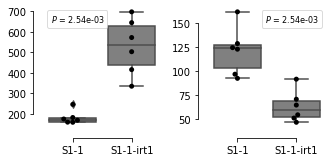

In [12]:
elements = ['Mn','Fe']
control=df[df['Sample'] == 'S1-1']
mutant=df[df['Sample'] == 'S1-1-irt1']
Order=['S1-1','S1-1-irt1']

def histoplot(df,idx,element):
    sns.boxplot(x=df['Sample'], 
            y=element,
            color='grey',
            data=df,
            order=Order,
            linewidth=1.5,
            ax=axes[idx])
    sns.swarmplot(x=df['Sample'],
          y=element, 
          data=df,
          order=Order,
          color="0",
          ax=axes[idx])
    axes[idx].set_xlabel('')
    handles = [mpl_patches.Rectangle((0, 0), 1, 1, fc="white", ec="white", 
                                 lw=0, alpha=0)] * 2
    labels = []
    r,p = mannwhitneyu(control[element],mutant[element])
    labels.append(r"$P$ = {:.2e}".format(p))
    axes[idx].legend(handles, labels, loc='best', fontsize=8, 
          fancybox=True, framealpha=0.7, 
          handlelength=0, handletextpad=0)

cm = 1/2.54
fig, axes = plt.subplots(1,2,sharey=False,figsize=(12*cm, 6*cm))
for index, value in enumerate(elements):
    histoplot(df,index,value)
    axes[index].set_ylabel('')

sns.despine(offset=10, trim= True) 
plt.tight_layout()
plt.savefig("Fig3B.png", format="png",bbox_inches="tight",facecolor='w',dpi=800)